In [7]:
import pandas as pd
import numpy as np

from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB4, Xception, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Conv2D, Flatten,Input,Dropout,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from tensorflow.math import confusion_matrix
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub


In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

In [9]:


if tf.test.is_gpu_available():
    print("GPU is available.")
else:
    print("GPU is not available.")


GPU is not available.


In [10]:
labels = pd.read_csv("../input/dog-breed-identification/labels.csv")
labels


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [11]:
sample_submission_csv=pd.read_csv("/kaggle/input/dog-breed-identification/sample_submission.csv")
sample_submission_csv

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,ffeda8623d4eee33c6d1156a2ecbfcf8,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10353,fff1ec9e6e413275984966f745a313b0,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10354,fff74b59b758bbbf13a5793182a9bbe4,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
10355,fff7d50d848e8014ac1e9172dc6762a3,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [161]:
labelnames=pd.read_csv("/kaggle/input/dog-breed-identification/sample_submission.csv").keys()[1:]
labelnames


Index(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller', 'australian_terrier',
       'basenji', 'basset', 'beagle',
       ...
       'toy_poodle', 'toy_terrier', 'vizsla', 'walker_hound', 'weimaraner',
       'welsh_springer_spaniel', 'west_highland_white_terrier', 'whippet',
       'wire-haired_fox_terrier', 'yorkshire_terrier'],
      dtype='object', length=120)

In [13]:
# datamın olduğu klasörün yolunu bir değişkene atıyorum.
my_data_dir = "/kaggle/input/dog-breed-identification"

In [14]:

os.listdir(my_data_dir)

['sample_submission.csv', 'test', 'train', 'labels.csv']

In [15]:


test_path = os.path.join(my_data_dir, 'test')     
train_path = os.path.join(my_data_dir, 'train')  

# os.path.join bizim işletim sistemize göre dosya yollarını belirliyor.

In [ ]:
test=os.listdir(test_path)


In [ ]:

test[0]

In [ ]:
len(test) 

In [ ]:
test = np.array(sorted(test))
test

In [ ]:
train=os.listdir(train_path)


In [ ]:
len(train) 

In [ ]:
train=np.array(sorted(train))
train

'U', Unicode tipini temsil eder.Unicode, dunya genelindeki bilgisayar
 sistemlerinde metin karakterlerini temsil etmek için kullanılan bir standarttır.  
36, her bir karakter dizisinin en fazla 36 karakter uzunluğunda olduğunu belirtir.
         

In [16]:
# Create pathnames from image ID's
filenames = [train_path + fname + ".jpg" for fname in labels["id"]]

# Check the first 10 filenames
filenames[:10]

['/kaggle/input/dog-breed-identification/train000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/kaggle/input/dog-breed-identification/train001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/kaggle/input/dog-breed-identification/train001cdf01b096e06d78e9e5112d419397.jpg',
 '/kaggle/input/dog-breed-identification/train00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/kaggle/input/dog-breed-identification/train0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/kaggle/input/dog-breed-identification/train002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/kaggle/input/dog-breed-identification/train00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/kaggle/input/dog-breed-identification/train002a283a315af96eaea0e28e7163b21b.jpg',
 '/kaggle/input/dog-breed-identification/train003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/kaggle/input/dog-breed-identification/train0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
if len(os.listdir(train_path)) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

In [16]:
#dog-breed-identification dizininde gezinin ve dosya sayısını listeleyin:klasorlerin yapısını gormek için 
for dirpath, dirnames, filenames in os.walk(my_data_dir):
    print(
        f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 2 images in '/kaggle/input/dog-breed-identification'.
There are 0 directories and 10357 images in '/kaggle/input/dog-breed-identification/test'.
There are 0 directories and 10222 images in '/kaggle/input/dog-breed-identification/train'.


In [ ]:
labels["filenames"] = filenames
labels

In [17]:
labels["breed"].value_counts()#.plot.bar(figsize=(20, 10));

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

In [ ]:
path1 = os.path.join(train_path,train[0])
path2 = os.path.join(test_path,test[0])
train_img = imread(path1)
test_img = imread(path2)
# elimizdeki resimler png formatında biz bunları imread ile array'e çeviriyoruz.
#çunku imshow metodu  array alabildiği için imread bu işlevi görüyor  
#imread'i matplotlib içerisinden import ettik
train_img

"train_img" adlı bir array verisidir. Bu array, bir resmin piksel değerlerini içerir. Her bir piksel, üç değerden oluşan bir RGB (Kırmızı, Yeşil, Mavi) renk değeri içerir.

Array'in şekli (boyutu) 3 boyutludur. İlk boyut, resmin yüksekliğini temsil eder. İkinci boyut, resmin genişliğini temsil eder. Üçüncü boyut ise RGB renk kanallarını temsil eder.

Örneğin, "train_img" array'inin şekli (yükseklik, genişlik, 3) olabilir. Bu durumda, resim 3 renk kanalına (RGB) sahip olur. Her bir piksel, bu üç renk kanalının değerlerini içeren bir vektör olarak temsil edilir.

Örneğin, "train_img" array'inin ilk pikseli şu şekilde temsil edilebilir: [108, 46, 0]. Bu pikselin kırmızı bileşeni 108, yeşil bileşeni 46 ve mavi bileşeni 0'dır.

Bu şekilde, tüm resmin piksel değerleri array içinde temsil edilir.



In [ ]:
train_img.shape

In [ ]:
# imshow ile array formatındaki resmi artık okutabiliriz.
plt.imshow(train_img)
plt.show()

In [ ]:
# View an image
import random


def view_random_image(target_dir, target_class):
    """Display and return an image given the target_dir and target_class.
    Args:
        target_dir (str): The full or relative path of the directory of the target.
        target_class (str): The name of the target_class you want to display and return.
    Returns:
        img: (np.ndarray): Image as numpy array.
    """
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")  # show the shape of the image

    return img


img = view_random_image(target_dir=my_data_dir, target_class="train")

In [ ]:
x = [
    imread(os.path.join(my_data_dir, "train", image)).shape[0]
    for image in os.listdir(os.path.join(my_data_dir, "train"))
]
z = [
    imread(os.path.join(my_data_dir, "train", image)).shape[1]
    for image in os.listdir(os.path.join(my_data_dir, "train"))
]

In [ ]:
np.mean(x), np.median(x)

In [ ]:
np.mean(z), np.median(z)

In [ ]:
sns.scatterplot(x=x, y=z)
plt.show()

In [ ]:
labels["breed"].value_counts()#.plot.bar(figsize=(20, 10));

In [19]:
codes = range(len(labelnames))
breed_to_code = dict(zip(labelnames, codes))
code_to_breed = dict(zip(codes, labelnames))
labels['target'] =  [breed_to_code[x] for x in labels["breed"]]
labels

,id,breed,target
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,19
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,37
2,001cdf01b096e06d78e9e5112d419397,pekinese,85
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,15
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,49
...,...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi,18
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont,35
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale,3
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher,75


In [23]:
train_path = '/kaggle/input/dog-breed-identification/train'
test_path =  "/kaggle/input/dog-breed-identification/test"

In [21]:
import cv2
import os
import numpy as np

# Dosya yollarını içeren dataframe'i oluşturun (df)
# Burada df, verilerinizi içeren bir dataframe olmalıdır.
def read_and_resize_image_rgb(file_path):
    img = cv2.imread(file_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img_rgb_resized = cv2.resize(img_rgb, (224, 224))
    return img_rgb_resized

# Dosya yollarını içeren sütunu kullanarak resimleri okuyun ve boyutlandırın
processed_images = []
for idx, filename in enumerate(labels['id']):
    img_path = os.path.join(train_path, filename + '.jpg')
    resized_img = read_and_resize_image_rgb(img_path)
    processed_images.append(resized_img)


# Liste içindeki resimleri NumPy array'e dönüştürün
processed_images_array = np.array(processed_images)




processed_images shape: (10222, 224, 224, 3)
processed_images dtype: uint8
labels shape: (10222,)
labels dtype: int64


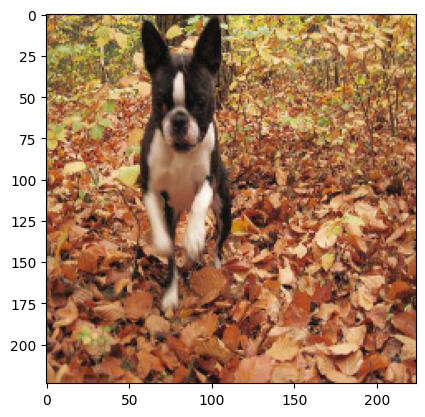

In [22]:
print("processed_images shape:", processed_images_array.shape)
print("processed_images dtype:", processed_images_array.dtype)
print("labels shape:",labels['target'].shape)  # Bu sadece numpy dizileri için geçerlidir
print("labels dtype:",labels['target'].dtype)

# processed_images'in ilk resmi görselleştirme
import matplotlib.pyplot as plt
plt.imshow(processed_images_array[0])
plt.show()

In [27]:
def read_and_resize_image_rgb(file_path):
    img = cv2.imread(file_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img_rgb_resized = cv2.resize(img_rgb, (224, 224))
    return img_rgb_resized

# Dosya yollarını içeren sütunu kullanarak resimleri okuyun ve boyutlandırın
processed2_images = []
for idx, filename in enumerate(sample_submission_csv['id']):
    img_path = os.path.join(test_path, filename + '.jpg')
    resized_img = read_and_resize_image_rgb(img_path)
    processed2_images.append(resized_img)


# Liste içindeki resimleri NumPy array'e dönüştürün
processed2_images_array = np.array(processed2_images)

processed_images shape: (10357, 224, 224, 3)
processed_images dtype: uint8
labels shape: (10357,)
labels dtype: object


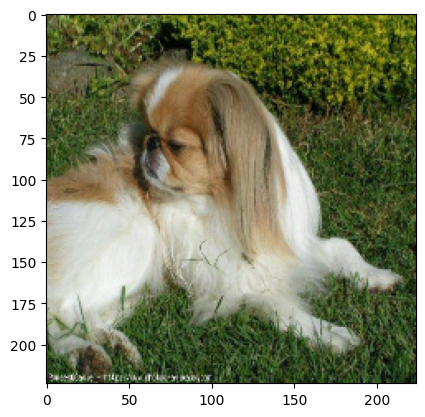

In [29]:
print("processed_images shape:", processed2_images_array.shape)
print("processed_images dtype:", processed2_images_array.dtype)
print("labels shape:",sample_submission_csv['id'].shape)  # Bu sadece numpy dizileri için geçerlidir
print("labels dtype:",sample_submission_csv['id'].dtype)

# processed_images'in ilk resmi görselleştirme
import matplotlib.pyplot as plt
plt.imshow(processed2_images_array[0])
plt.show()

# Train Test Split

In [30]:
X=processed_images_array
y=labels["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8177, 224, 224, 3)
(2045, 224, 224, 3)
(8177,)
(2045,)


# Scaling

Let's check the images if they are needed to be scaled or not

In [ ]:
train_img.max(),train_img.min()

In [ ]:
test_img.max(),test_img.min()

As we see above, images need to be scaled

# Image Data Generator

Image Manipulation

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

Accepts a batch of images used for training.
Applies a series of random transformations to each image in the batch.
Replaces the original batch with randomly transformed batch.
Training the CNN on this randomly transformed batch.
The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [32]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)          

In [33]:
training_set=train_datagen.flow(X_train,y=y_train,batch_size=128)
testing_set=test_datagen.flow(X_test,y=y_test,batch_size=128)

In [ ]:
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dropout(0.2),
    Dense(120, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Early Stopping ayarları
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
model.summary()

In [ ]:
history=model.fit_generator(training_set,validation_data = testing_set,epochs = 5,   callbacks=[early_stopping] )

In [ ]:
# Eğitim sürecinin sonunda modelin başarı oranını değerlendirin
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Eğitim geçmişini DataFrame'e dönüştürme
history_df = pd.DataFrame(history.history)

# Grafik oluşturma
plt.figure(figsize=(12, 6))

# Loss değerlerini göster
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy değerlerini göster
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='accuracy')
plt.plot(history_df['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Transfer Learning (EfficientNetB4, Xception, ResNet50)

In [34]:
#Bu fonksiyon, önceden eğitilmiş bir modelin belirli bir katmanından özellik haritaları almak için kullanılır. 
def get_features(model_name, model_preprocessor, input_size, data):
    input_layer = Input(input_size)
    preprocessor = model_preprocessor(input_layer)
    base_model = model_name(weights='imagenet', include_top=False, input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs=input_layer, outputs=avg)
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape:', feature_maps.shape)
    return feature_maps

In [35]:
##Bu örnekte, get_features fonksiyonu içinde, belirli bir modeli ve preprocessorü kullanarak özellik çıkarımı yapıyoruz.
##Daha sonra, örnek modeller (EfficientNetB4, Xception, ResNet50) ve preprocessorleri 
#(effnet_preprocessor, xception_preprocessor, resnet_preprocessor) kullanarak bu özellik çıkarımını gerçekleştiriyoruz.

effnet_preprocessor = tf.keras.applications.efficientnet.preprocess_input
effnet_features = get_features(EfficientNetB4, effnet_preprocessor, (224, 224, 3),X)

xception_preprocessor = tf.keras.applications.xception.preprocess_input
xception_features = get_features(Xception, xception_preprocessor, (224, 224, 3), X)

resnet_preprocessor = tf.keras.applications.resnet50.preprocess_input
resnet_features = get_features(ResNet50, resnet_preprocessor, (224, 224, 3), X)

320/320 [==============================] - 1128s 4s/step
Feature maps shape: (10222, 1792)
320/320 [==============================] - 1033s 3s/step
Feature maps shape: (10222, 2048)
320/320 [==============================] - 951s 3s/step
Feature maps shape: (10222, 2048)


In [36]:
final_features = np.concatenate([effnet_features, xception_features, resnet_features], axis=-1)
print('Final feature maps shape:', final_features.shape)


Final feature maps shape: (10222, 5888)


In [145]:
from keras.layers import BatchNormalization


model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(final_features.shape[1],)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(120, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [130]:
#checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [146]:
history = model.fit(final_features, y,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.2,
                    callbacks=[ early_stopping])

Epoch 1/20
64/64 [==============================] - 3s 27ms/step - loss: 3.9662 - accuracy: 0.1641 - val_loss: 2.4407 - val_accuracy: 0.6024
Epoch 2/20
64/64 [==============================] - 1s 23ms/step - loss: 2.5817 - accuracy: 0.4518 - val_loss: 1.4660 - val_accuracy: 0.7487
Epoch 3/20
64/64 [==============================] - 1s 23ms/step - loss: 1.9204 - accuracy: 0.5838 - val_loss: 0.9803 - val_accuracy: 0.7980
Epoch 4/20
64/64 [==============================] - 1s 23ms/step - loss: 1.4978 - accuracy: 0.6612 - val_loss: 0.7281 - val_accuracy: 0.8293
Epoch 5/20
64/64 [==============================] - 1s 23ms/step - loss: 1.2474 - accuracy: 0.6987 - val_loss: 0.6971 - val_accuracy: 0.8298
Epoch 6/20
64/64 [==============================] - 1s 23ms/step - loss: 1.0848 - accuracy: 0.7237 - val_loss: 0.5772 - val_accuracy: 0.8372
Epoch 7/20
64/64 [==============================] - 1s 23ms/step - loss: 0.9468 - accuracy: 0.7500 - val_loss: 0.5620 - val_accuracy: 0.8445
Epoch 8/20
64

In [147]:
history_df = pd.DataFrame(history.history)
history_df[10:]

,loss,accuracy,val_loss,val_accuracy
10,0.699011,0.800538,0.496228,0.854768
11,0.626034,0.822306,0.479126,0.861614
12,0.600036,0.827687,0.492932,0.854768
13,0.571633,0.836737,0.470915,0.854768
14,0.540942,0.840161,0.455414,0.858680
15,0.521531,0.845298,0.474806,0.860636
16,0.491490,0.855570,0.459130,0.857213


In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

# Verilerinizi yükleyin ve işleyin
# Örnek olarak, veri yükleme işlemlerini eklemelisiniz.

# Modeli oluşturun ve derleyin
def build_model(hp):
    model = Sequential()
    model.add(Dropout(0.7, input_shape=(final_features.shape[1],)))
    model.add(Dense(120, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Keras Tuner RandomSearch için tuner'ı oluşturun
tuner = RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=5,  # Uygun bir sayı seçebilirsiniz
    directory='my_dir',
    project_name='dog_breed_classification'
)



# Hiperparametre aramasını başlatın
tuner.search(x=final_features, y=y, epochs=20, validation_split=0.2,)

# En iyi modeli ve hiperparametreleri alın
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values


In [86]:
history_df = pd.DataFrame(history.history)
history_df[15:]

,loss,accuracy,val_loss,val_accuracy
15,0.437003,0.856304,0.496403,0.857213


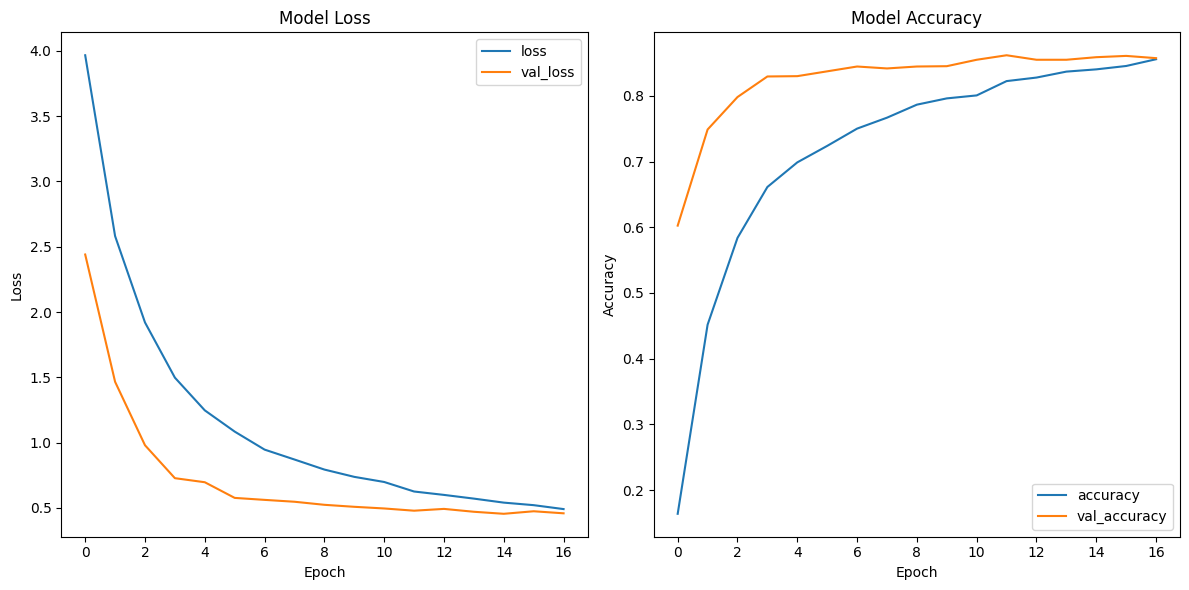

In [148]:

# Eğitim geçmişini DataFrame'e dönüştürme
history_df = pd.DataFrame(history.history)

# Grafik oluşturma
plt.figure(figsize=(12, 6))

# Loss değerlerini göster
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy değerlerini göster
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='accuracy')
plt.plot(history_df['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Model Evaluation

In [48]:
#best_model = load_model('best_model.h5')

In [ ]:


# Confusion matrix oluştur
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Heatmap'i oluştur
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_to_num, yticklabels=class_to_num)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [ ]:
test_path="/kaggle/input/dog-breed-identification/test"

In [39]:
effnet_preprocessor = tf.keras.applications.efficientnet.preprocess_input
effnet_features = get_features(EfficientNetB4, effnet_preprocessor, (224, 224, 3),processed2_images_array)

xception_preprocessor = tf.keras.applications.xception.preprocess_input

xception_features = get_features(Xception, xception_preprocessor, (224, 224, 3), processed2_images_array)

resnet_preprocessor = tf.keras.applications.resnet50.preprocess_input
resnet_features = get_features(ResNet50, resnet_preprocessor, (224, 224, 3), processed2_images_array)

324/324 [==============================] - 1108s 3s/step
Feature maps shape: (10357, 1792)
324/324 [==============================] - 1043s 3s/step
Feature maps shape: (10357, 2048)
324/324 [==============================] - 992s 3s/step
Feature maps shape: (10357, 2048)


In [40]:
final_features2 = np.concatenate([effnet_features, xception_features, resnet_features], axis=-1)
print('Final feature maps shape:', final_features2.shape)

Final feature maps shape: (10357, 5888)


In [150]:
#Predict test labels given test data features.
y_pred = model.predict(final_features2, batch_size=128)

81/81 [==============================] - 1s 7ms/step


In [ ]:
predictions = model.predict(processed2_images_array)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y)

In [ ]:
dog_breds=sorted(labelnames)


n_classes = len(dog_breeds)
class_to_num = dict(zip(dog_breeds, range(n_classes)))
class_to_num

In [179]:
for b in dog_breds:
    sample_submission_csv[b] = y_pred[:,class_to_num[b]]
sample_submission_csv.to_csv('pred.csv', index=None)